<a name="1"></a>
# **<h1 id="1" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Machine Learning Final Project: Question 2</h1>**

## Team members:
 - ## <span style="color:green">521H0489: Hồ Hữu An</span>.
 - ## <span style="color:green">521H0491: Trần Nhựt Anh</span>.
 - ## <span style="color:green">521H0290: Đỗ Minh Quân</span>.

<a name="2"></a>
# **<h1 id="2" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Import Libraries</h1>**

In [456]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, StackingClassifier, VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from keras import regularizers
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

<a name="3"></a>
# **<h1 id="3" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Exploratory Data Analysis and Wrangling</h1>**

## `Read data`

In [355]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

## `Get sample`

In [299]:
train_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
31019,38,management,divorced,tertiary,no,0,no,no,cellular,10,feb,49,3,-1,0,unknown,no
34957,29,management,single,tertiary,no,471,yes,no,cellular,6,may,106,1,-1,0,unknown,no
28090,28,management,single,tertiary,no,20,no,no,cellular,28,jan,144,2,-1,0,unknown,no
14512,37,technician,married,secondary,no,0,yes,yes,cellular,15,jul,101,3,-1,0,unknown,no
44780,72,admin.,married,primary,no,2321,no,no,cellular,14,sep,221,2,64,12,failure,yes
36605,39,blue-collar,married,primary,no,398,yes,no,cellular,12,may,256,1,-1,0,unknown,no
6685,31,blue-collar,married,secondary,no,298,yes,no,unknown,28,may,154,3,-1,0,unknown,no
33173,37,management,married,tertiary,no,17335,no,no,cellular,20,apr,108,1,-1,0,unknown,no
2532,56,self-employed,married,secondary,no,123,no,no,unknown,13,may,81,1,-1,0,unknown,no
25286,44,management,married,tertiary,no,13853,yes,no,cellular,18,nov,1329,3,-1,0,unknown,no


In [300]:
test_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2031,33,management,married,tertiary,no,4,yes,no,cellular,16,jul,285,5,-1,0,unknown,no
2148,62,management,married,tertiary,no,1859,no,no,telephone,6,aug,245,3,-1,0,unknown,yes
2742,47,blue-collar,married,secondary,no,1203,yes,no,cellular,17,apr,239,2,-1,0,unknown,no
3812,26,blue-collar,single,primary,no,3342,yes,no,unknown,4,jun,329,4,-1,0,unknown,no
3722,29,self-employed,married,secondary,no,-76,yes,no,unknown,27,may,305,2,-1,0,unknown,no
1234,35,management,married,tertiary,no,8,yes,no,unknown,23,may,55,4,-1,0,unknown,no
2840,55,services,married,secondary,no,557,no,no,unknown,19,jun,58,1,-1,0,unknown,no
3120,47,technician,married,primary,no,187,yes,no,unknown,9,may,165,1,-1,0,unknown,no
2296,32,blue-collar,married,secondary,no,1905,yes,no,cellular,16,jul,709,2,-1,0,unknown,yes
2462,30,services,married,tertiary,no,1380,yes,no,unknown,21,may,294,2,-1,0,unknown,no


## `Get data informaion`

In [301]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Statistical analysis on data and Visualization

## `1. Overview statistics`

In [302]:
train_df.describe().round(2).style.format(precision=2).background_gradient(cmap="Blues")

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


## `2. Correlation Matrix`

Text(0.5, 1.0, 'Data correlations')

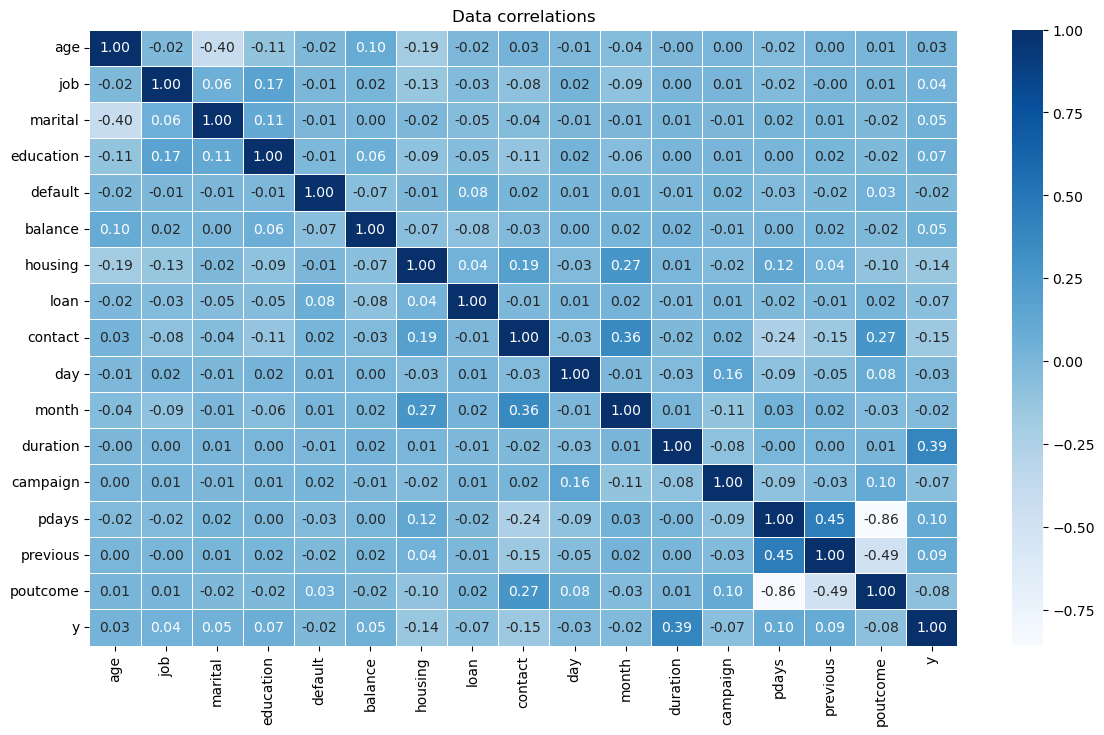

In [303]:
encoded_train = train_df.copy()

for column in encoded_train.columns:
    if encoded_train[column].dtype == 'object':
        label_encoder = LabelEncoder()
        encoded_train[column] = label_encoder.fit_transform(encoded_train[column])

correlation = encoded_train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,fmt='.2f',annot_kws={'size': 10},linewidths=0.5,cmap='Blues')
plt.title("Data correlations")

## `3. Chart Box`

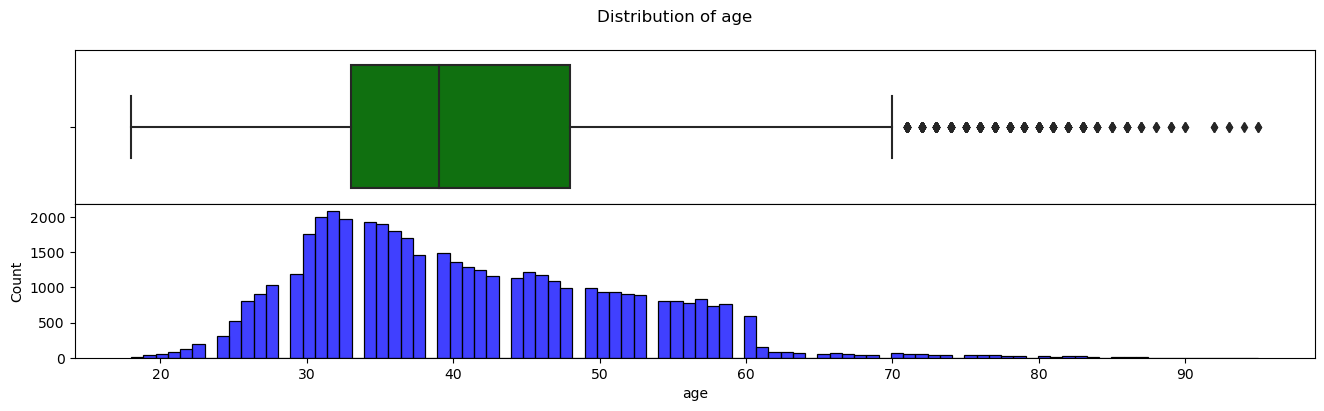

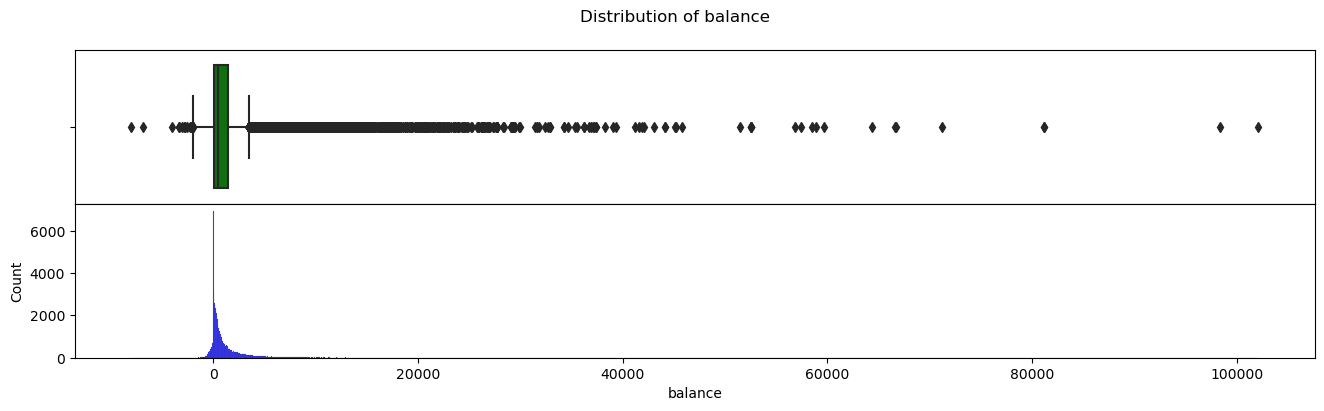

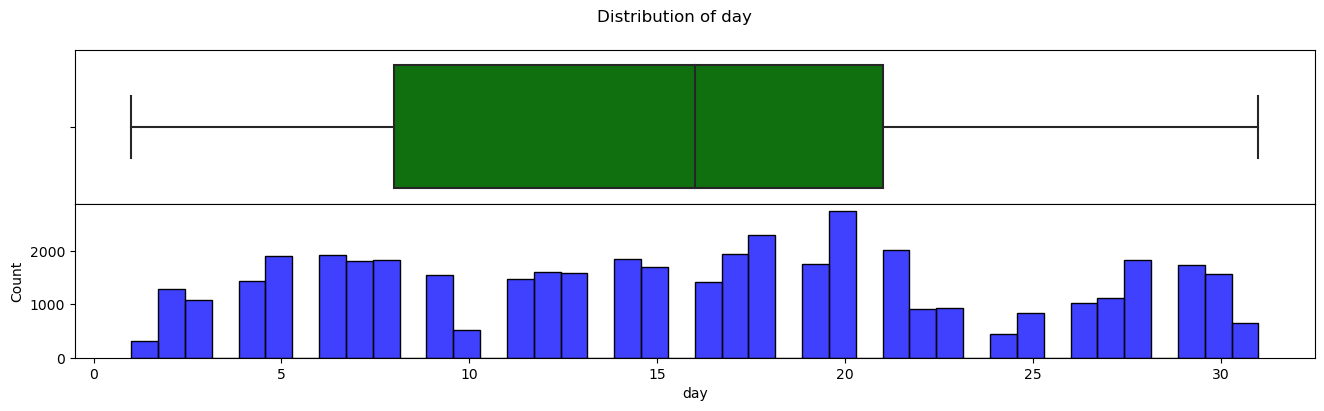

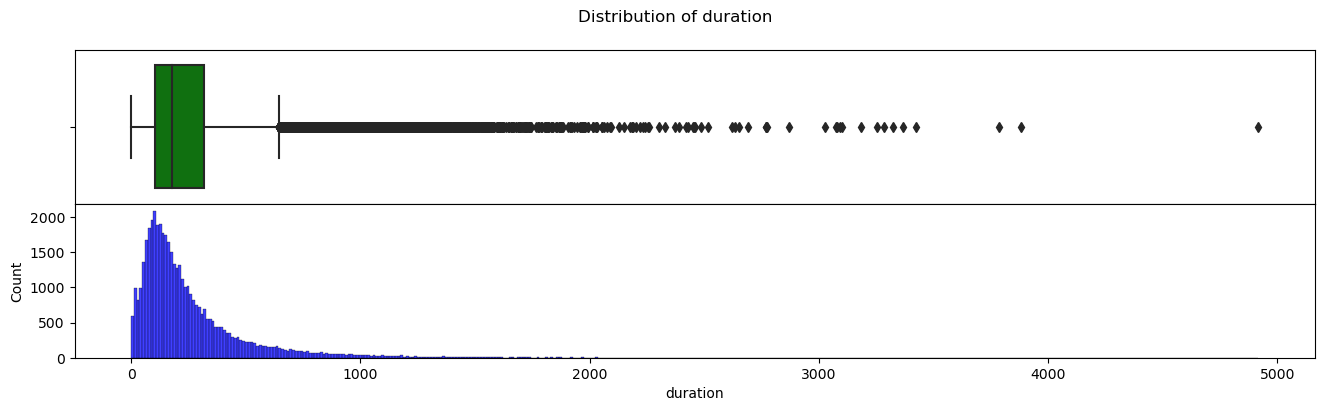

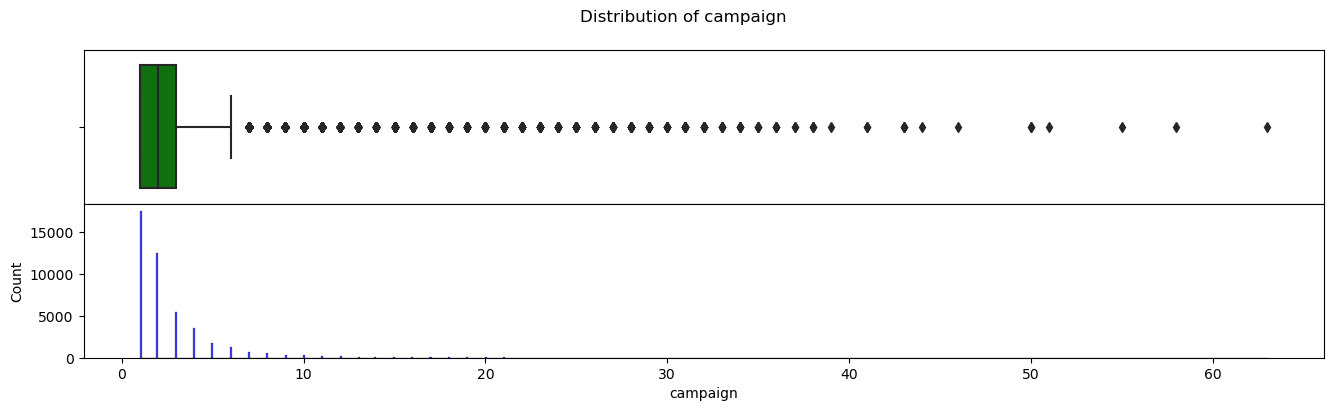

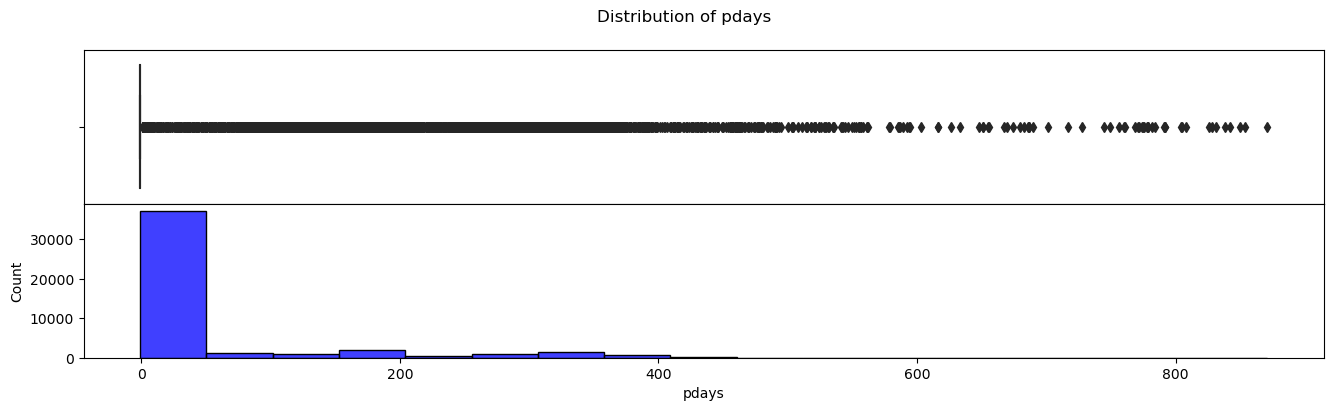

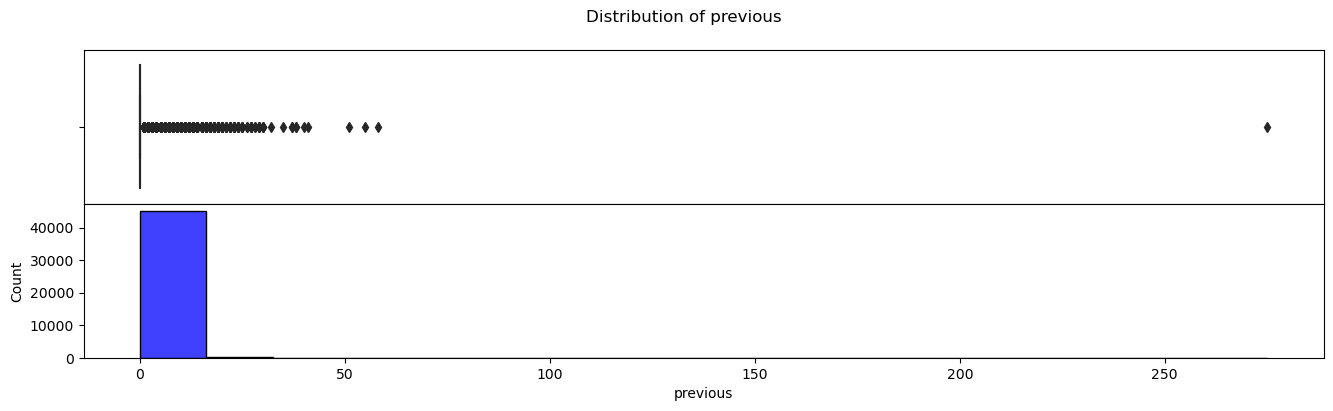

In [304]:
numerical = train_df.select_dtypes(exclude='object')
n = len(numerical)

for col in numerical:
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
    plt.suptitle(f"Distribution of {col}")
    sns.boxplot(data=train_df, x=col, ax=ax1, color="Green")
    ax1.set_xlabel(None)
    ax1.get_xaxis().set_ticks([])
    sns.histplot(data=train_df, x=col, ax=ax2, color="Blue")
    plt.subplots_adjust(hspace=0)
    print("\n")
    plt.show()

## `4. Target class imbalance`

Count of each Status:
no     39922
yes     5289
Name: y, dtype: int64



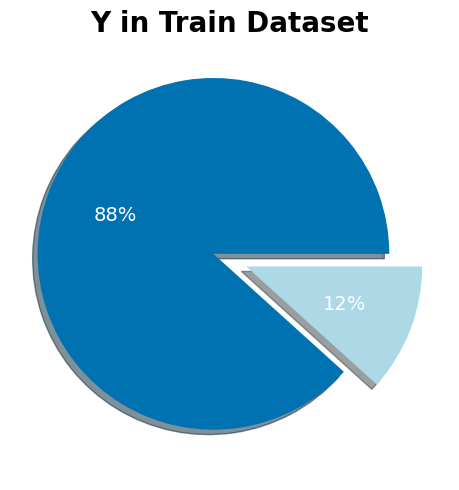

In [305]:
status_counts = train_df['y'].value_counts()
print("Count of each Status:")
print(status_counts)
print()

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.pie(
    train_df['y'].value_counts(), 
    shadow=True, 
    explode=[.1 for i in range(train_df['y'].nunique())],
    autopct='%1.f%%',
    textprops={'size': 14, 'color': 'white'}
)
ax.set_title('Y in Train Dataset', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

# Data preprocessing

## `1 Data encoding`

In [356]:
train_df = pd.get_dummies(train_df, columns=['education'])

In [357]:
test_df = pd.get_dummies(test_df, columns=['education'])

In [358]:
le = LabelEncoder()
train_df = train_df.apply(le.fit_transform)
train_df

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,education_primary,education_secondary,education_tertiary,education_unknown
0,40,4,1,0,3036,1,0,2,4,8,261,0,0,0,3,0,0,0,1,0
1,26,9,2,0,945,1,0,2,4,8,151,0,0,0,3,0,0,1,0,0
2,15,2,1,0,918,1,1,2,4,8,76,0,0,0,3,0,0,1,0,0
3,29,1,1,0,2420,1,0,2,4,8,92,0,0,0,3,0,0,0,0,1
4,15,11,2,0,917,0,0,2,4,8,198,0,0,0,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,0,1741,0,0,0,16,9,975,2,0,0,3,1,0,0,1,0
45207,53,5,0,0,2639,0,0,0,16,9,456,1,0,0,3,1,1,0,0,0
45208,54,5,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1,0,1,0,0
45209,39,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0,0,1,0,0


In [359]:
test_df = test_df.apply(le.fit_transform)
test_df

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,education_primary,education_secondary,education_tertiary,education_unknown
0,11,10,1,0,1475,0,0,0,18,10,75,0,0,0,3,0,1,0,0,0
1,14,7,1,0,2030,1,1,0,10,8,216,0,228,4,0,0,0,1,0,0
2,16,4,2,0,1303,1,0,0,15,0,181,0,219,1,0,0,0,0,1,0
3,11,4,1,0,1352,1,1,2,2,6,195,3,0,0,3,0,0,0,1,0
4,40,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,0,119,1,0,0,29,5,325,4,0,0,3,0,0,1,0,0
4517,38,6,1,1,0,1,1,2,8,8,149,0,0,0,3,0,0,0,1,0
4518,38,9,1,0,558,0,0,0,18,1,147,10,0,0,3,0,0,1,0,0
4519,9,1,1,0,1187,0,0,0,5,3,125,3,140,3,1,0,0,1,0,0


## `2 Data Normalization`

In [360]:
columns_to_scale = ['age','balance','duration','campaign','pdays','previous']
scaler = MinMaxScaler()

# FOR TRAIN DATA
scaled_values = scaler.fit_transform(train_df[columns_to_scale])
train_df[columns_to_scale] = scaled_values

aggregated_train = train_df[columns_to_scale].agg(['mean', 'min', 'max', 'median', 'std']).style.background_gradient(cmap='Greens')
aggregated_train

,age,balance,duration,campaign,pdays,previous
mean,0.301790,0.273937,0.162429,0.037497,0.071961,0.014334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
median,0.276316,0.190317,0.114504,0.021277,0.000000,0.000000
std,0.139711,0.204204,0.152456,0.065445,0.173687,0.046942


In [361]:
# FOR TEST DATA
scaled_values = scaler.fit_transform(test_df[columns_to_scale])
test_df[columns_to_scale] = scaled_values

aggregated_train = test_df[columns_to_scale].agg(['mean', 'min', 'max', 'median', 'std']).style.background_gradient(cmap='Greens')
aggregated_train

,age,balance,duration,campaign,pdays,previous
mean,0.335880,0.380399,0.276114,0.057524,0.087177,0.023475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
median,0.303030,0.296344,0.207094,0.032258,0.000000,0.000000
std,0.160124,0.269105,0.224668,0.096683,0.219324,0.072225


## `3 Data Splitting`

In [366]:
X_train = train_df.drop(columns=['y'], axis =1)
y_train = train_df['y']

X_test = test_df.drop(columns=['y'], axis =1)
y_test = test_df['y']

In [367]:
X_train

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,education_primary,education_secondary,education_tertiary,education_unknown
0,0.526316,4,1,0,0.423608,1,0,2,4,8,0.166031,0.000000,0.000000,0.000,3,0,0,1,0
1,0.342105,9,2,0,0.131854,1,0,2,4,8,0.096056,0.000000,0.000000,0.000,3,0,1,0,0
2,0.197368,2,1,0,0.128087,1,1,2,4,8,0.048346,0.000000,0.000000,0.000,3,0,1,0,0
3,0.381579,1,1,0,0.337659,1,0,2,4,8,0.058524,0.000000,0.000000,0.000,3,0,0,0,1
4,0.197368,11,2,0,0.127948,0,0,2,4,8,0.125954,0.000000,0.000000,0.000,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.434211,9,1,0,0.242919,0,0,0,16,9,0.620229,0.042553,0.000000,0.000,3,0,0,1,0
45207,0.697368,5,0,0,0.368215,0,0,0,16,9,0.290076,0.021277,0.000000,0.000,3,1,0,0,0
45208,0.710526,5,1,0,0.761127,0,0,0,16,9,0.709924,0.085106,0.324373,0.075,2,0,1,0,0
45209,0.513158,1,1,0,0.221013,0,0,1,16,9,0.323155,0.063830,0.000000,0.000,3,0,1,0,0


In [368]:
X_test

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,education_primary,education_secondary,education_tertiary,education_unknown
0,0.166667,10,1,0,0.627126,0,0,0,18,10,0.085812,0.000000,0.000000,0.000000,3,1,0,0,0
1,0.212121,7,1,0,0.863095,1,1,0,10,8,0.247140,0.000000,0.783505,0.173913,0,0,1,0,0
2,0.242424,4,2,0,0.553997,1,0,0,15,0,0.207094,0.000000,0.752577,0.043478,0,0,0,1,0
3,0.166667,4,1,0,0.574830,1,1,2,2,6,0.223112,0.096774,0.000000,0.000000,3,0,0,1,0
4,0.606061,1,1,0,0.116497,1,0,2,4,8,0.254005,0.000000,0.000000,0.000000,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.212121,7,1,0,0.050595,1,0,0,29,5,0.371854,0.129032,0.000000,0.000000,3,0,1,0,0
4517,0.575758,6,1,1,0.000000,1,1,2,8,8,0.170481,0.000000,0.000000,0.000000,3,0,0,1,0
4518,0.575758,9,1,0,0.237245,0,0,0,18,1,0.168192,0.322581,0.000000,0.000000,3,0,1,0,0
4519,0.136364,1,1,0,0.504677,0,0,0,5,3,0.143021,0.096774,0.481100,0.130435,1,0,1,0,0


<a name="4"></a>
# **<h1 id="4" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Basic Model</h1>**

In [315]:
def make_confusion_matrix(cm):
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    axe = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=True, annot_kws={'fontsize': 12})
    axe.set(xlabel="Predict", ylabel="Actual")

## `Logistic Regression`

In [316]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

Accuracy of KNN 0.8575536385755363
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      4000
           1       0.42      0.61      0.50       521

    accuracy                           0.86      4521
   macro avg       0.68      0.75      0.71      4521
weighted avg       0.89      0.86      0.87      4521



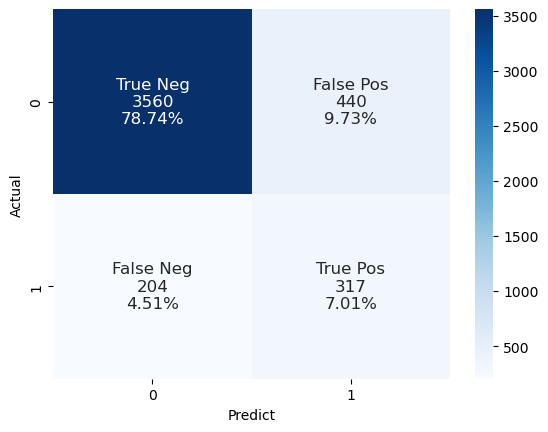

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      4000
           1       0.42      0.61      0.50       521

    accuracy                           0.86      4521
   macro avg       0.68      0.75      0.71      4521
weighted avg       0.89      0.86      0.87      4521



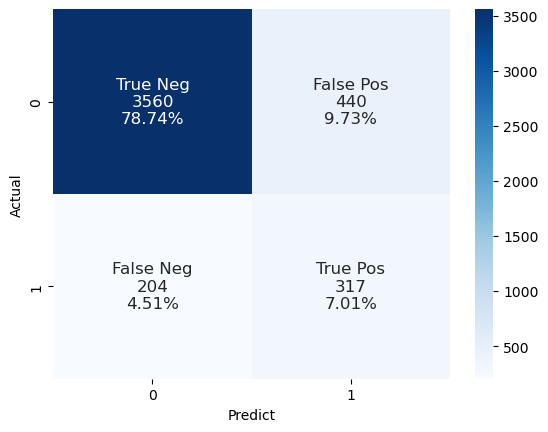

In [ ]:
y_LR_pred = LR.predict(X_test)

classification_report_LR = classification_report(y_test, y_LR_pred)
print(classification_report_LR)

confusion_matrix_LR = confusion_matrix(y_test, y_LR_pred)
make_confusion_matrix (confusion_matrix_LR)

## `KNN`

In [318]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4000
           1       0.69      0.26      0.38       521

    accuracy                           0.90      4521
   macro avg       0.80      0.62      0.66      4521
weighted avg       0.89      0.90      0.88      4521



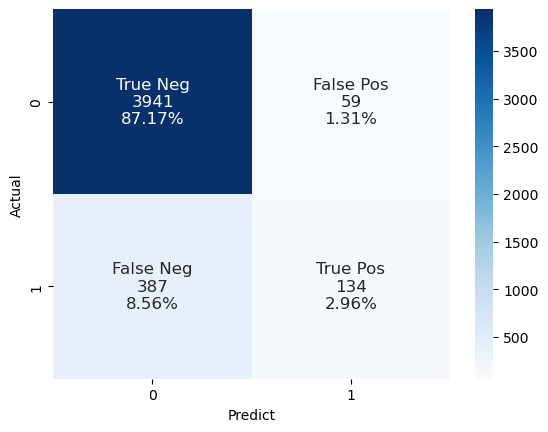

In [319]:
y_KNN_pred = KNN.predict(X_test.values)

classification_report_KNN = classification_report(y_test, y_KNN_pred)
print(classification_report_KNN)

confusion_matrix_KNN = confusion_matrix(y_test, y_KNN_pred)
make_confusion_matrix (confusion_matrix_KNN)

## `Decision Trree`

In [474]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      4000
           1       0.30      0.62      0.40       521

    accuracy                           0.79      4521
   macro avg       0.62      0.71      0.64      4521
weighted avg       0.87      0.79      0.82      4521



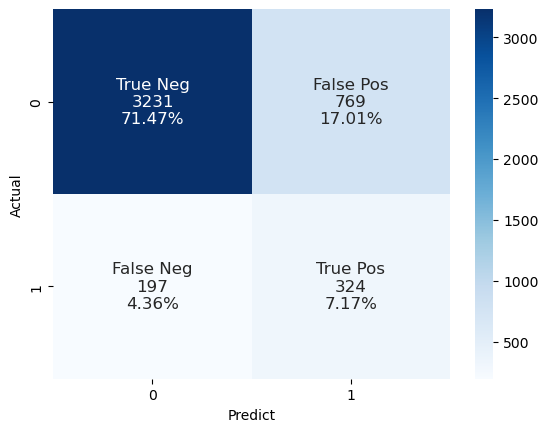

In [475]:
y_DT_pred = DT.predict(X_test.values)

classification_report_DT = classification_report(y_test, y_DT_pred)
print(classification_report_DT)

confusion_matrix_DT = confusion_matrix(y_test, y_DT_pred)
make_confusion_matrix (confusion_matrix_DT)

## `Naive Bayes`

In [322]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

Accuracy of Naive Bayes 0.7896483078964831
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      4000
           1       0.30      0.63      0.41       521

    accuracy                           0.79      4521
   macro avg       0.62      0.72      0.64      4521
weighted avg       0.87      0.79      0.82      4521



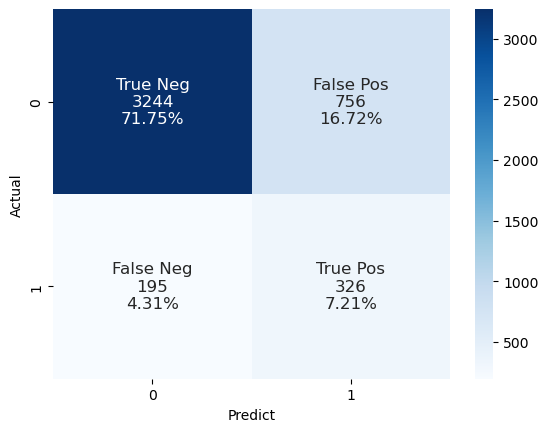

In [323]:
y_GNB_pred = DT.predict(X_test.values)

classification_report_GNB = classification_report(y_test, y_GNB_pred)
print(classification_report_GNB)

confusion_matrix_GNB = confusion_matrix(y_test, y_GNB_pred)
make_confusion_matrix (confusion_matrix_GNB)

## `SVM`

In [324]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

Accuracy of SVM 0.8847600088476001
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



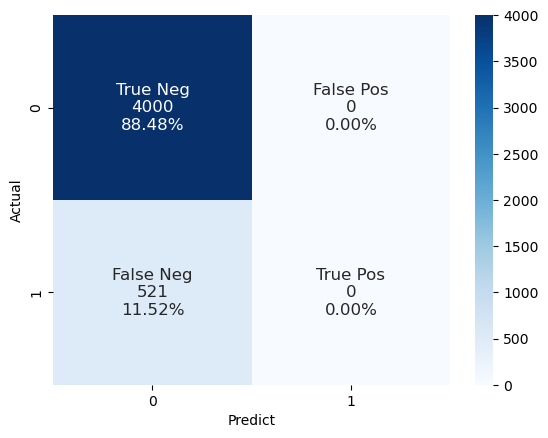

In [325]:
y_svm_pred=svm.predict(X_test)
accuracy_svm_before_improve = accuracy_score(y_test, y_svm_pred)
print("Accuracy of SVM",accuracy_svm_before_improve)
print(classification_report(y_test, y_svm_pred))
make_confusion_matrix (confusion_matrix(y_test, y_svm_pred))

classification_report_svm = classification_report(y_test, y_svm_pred)
print(classification_report_svm)

confusion_matrix_svm = confusion_matrix(y_test, y_svm_pred)
make_confusion_matrix (confusion_matrix_svm)

## `Perceptron`

In [326]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

Perceptron()

Accuracy of Perceptron 0.8697190886971908
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      4000
           1       0.43      0.38      0.40       521

    accuracy                           0.87      4521
   macro avg       0.67      0.66      0.66      4521
weighted avg       0.86      0.87      0.87      4521



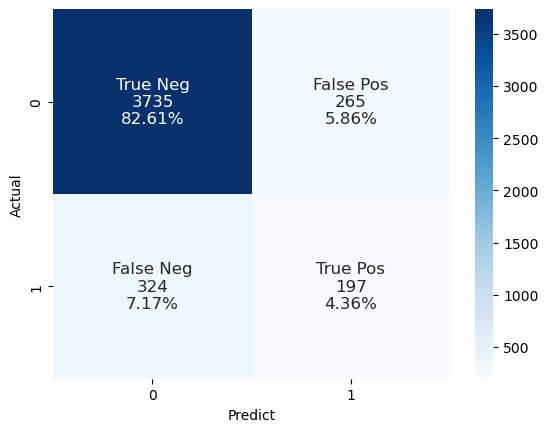

In [327]:
y_perceptron_pred=perceptron.predict(X_test)

classification_report_perceptron = classification_report(y_test, y_perceptron_pred)
print(classification_report_perceptron)

confusion_matrix_perceptron = confusion_matrix(y_test, y_perceptron_pred)
make_confusion_matrix (confusion_matrix_perceptron)

<a name="5"></a>
# **<h1 id="5" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Ensemble Learing</h1>**

## `Bagging`

In [328]:
bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=42)

Accuracy of Bagging 0.9110816191108162
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4000
           1       0.75      0.35      0.47       521

    accuracy                           0.91      4521
   macro avg       0.83      0.67      0.71      4521
weighted avg       0.90      0.91      0.90      4521



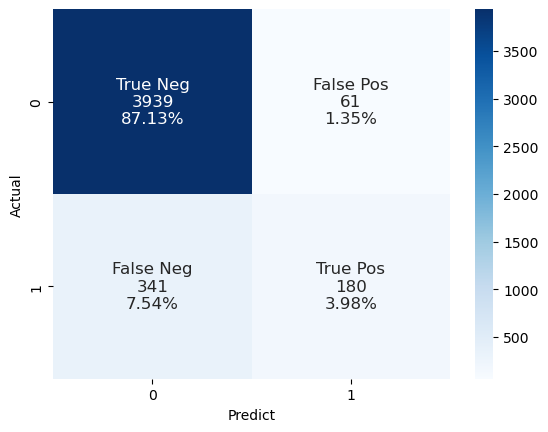

In [329]:
y_bagging_pred = bagging.predict(X_test)

classification_report_bagging = classification_report(y_test, y_bagging_pred)
print(classification_report_bagging)

confusion_matrix_bagging = confusion_matrix(y_test, y_bagging_pred)
make_confusion_matrix (confusion_matrix_bagging)

## `Voting`

In [330]:
voting = VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),('ada', AdaBoostClassifier()), ('rf', RandomForestClassifier()), ('logreg', LogisticRegression())], voting='hard')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('ada', AdaBoostClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('logreg', LogisticRegression())])

Accuracy of Voting 0.8927228489272285
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4000
           1       0.53      0.61      0.57       521

    accuracy                           0.89      4521
   macro avg       0.74      0.77      0.75      4521
weighted avg       0.90      0.89      0.90      4521



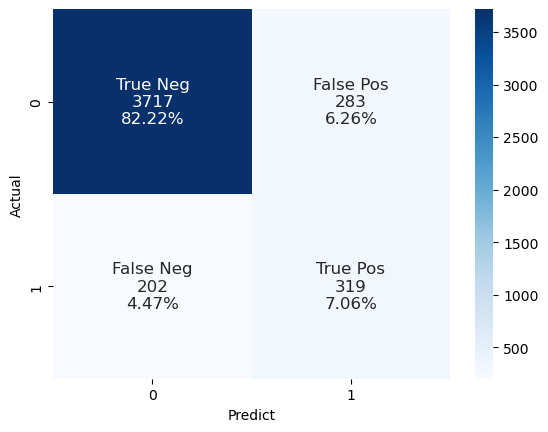

In [331]:
y_voting_pred = voting.predict(X_test)

classification_report_voting = classification_report(y_test, y_voting_pred)
print(classification_report_voting)

confusion_matrix_voting = confusion_matrix(y_test, y_voting_pred)
make_confusion_matrix (confusion_matrix_voting)

## `Stacking`

In [332]:
stacking = StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),('ada', AdaBoostClassifier()), ('rf', RandomForestClassifier())], final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('ada', AdaBoostClassifier()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

Accuracy of Stacking 0.8847600088476001
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



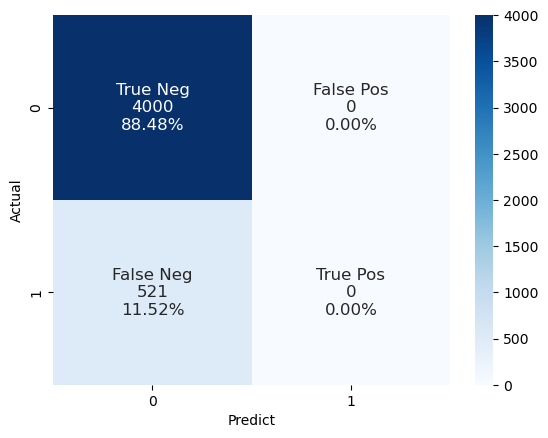

In [333]:
y_stacking_pred = stacking.predict(X_test)

classification_report_stacking = classification_report(y_test, y_stacking_pred)
print(classification_report_stacking)

confusion_matrix_stacking = confusion_matrix(y_test, y_stacking_pred)
make_confusion_matrix (confusion_matrix_stacking)

## `Random Forest`

In [462]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      4000
           1       0.49      0.73      0.59       521

    accuracy                           0.88      4521
   macro avg       0.73      0.82      0.76      4521
weighted avg       0.91      0.88      0.89      4521



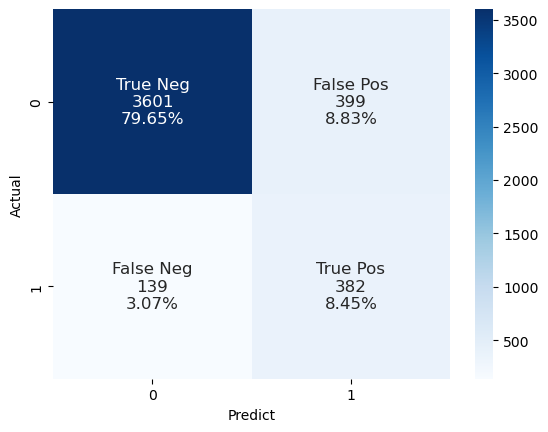

In [463]:
y_RF_pred = RF.predict(X_test)

classification_report_RF = classification_report(y_test, y_RF_pred)
print(classification_report_RF)

confusion_matrix_RF = confusion_matrix(y_test, y_RF_pred)
make_confusion_matrix (confusion_matrix_RF)

## `Gradient Boosting`

In [336]:
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier()

Accuracy of Gradient Boosting 0.8697190886971908
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      4000
           1       0.46      0.73      0.56       521

    accuracy                           0.87      4521
   macro avg       0.71      0.81      0.74      4521
weighted avg       0.90      0.87      0.88      4521



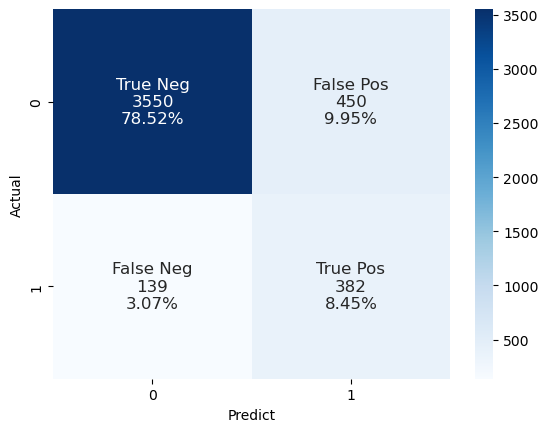

In [337]:
y_GB_pred = GB.predict(X_test)
accuracy_GB_before_improve = accuracy_score(y_test, y_GB_pred)
print("Accuracy of Gradient Boosting",accuracy_GB_before_improve)
print(classification_report(y_test, y_GB_pred))
make_confusion_matrix (confusion_matrix(y_test, y_GB_pred))

## `Adaboost`

In [338]:
ADA = AdaBoostClassifier(n_estimators=50)
ADA.fit(X_train, y_train)

AdaBoostClassifier()

Accuracy of Adaboost 0.8604291086042911
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      4000
           1       0.42      0.57      0.49       521

    accuracy                           0.86      4521
   macro avg       0.68      0.74      0.70      4521
weighted avg       0.88      0.86      0.87      4521



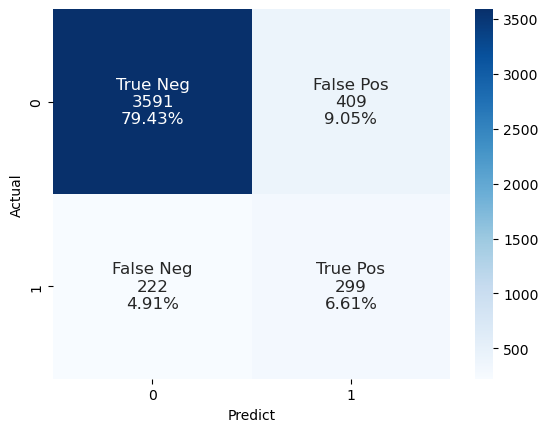

In [339]:
y_ADA_pred = ADA.predict(X_test)
accuracy_ADA_before_improve = accuracy_score(y_test, y_ADA_pred)
print("Accuracy of Adaboost",accuracy_ADA_before_improve)
print(classification_report(y_test, y_ADA_pred))
make_confusion_matrix (confusion_matrix(y_test, y_ADA_pred))

## `XGBoost`

In [340]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      4000
           1       0.44      0.73      0.55       521

    accuracy                           0.86      4521
   macro avg       0.70      0.80      0.74      4521
weighted avg       0.90      0.86      0.88      4521



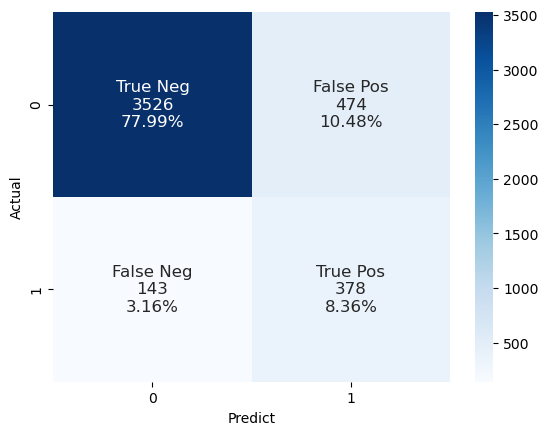

In [341]:
y_xgb_pred = xgb.predict(X_test)

classification_report_xgb = classification_report(y_test, y_xgb_pred)
print(classification_report_xgb)

confusion_matrix_xgb = confusion_matrix(y_test, y_xgb_pred)
make_confusion_matrix (confusion_matrix_xgb)

## `LightGBM`

In [342]:
LGB = lgb.LGBMClassifier(random_state=42, n_estimators=200, n_jobs=100)
LGB.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5289, number of negative: 39922
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 45211, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116985 -> initscore=-2.021298
[LightGBM] [Info] Start training from score -2.021298


LGBMClassifier(n_estimators=200, n_jobs=100, random_state=42)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      4000
           1       0.45      0.79      0.57       521

    accuracy                           0.86      4521
   macro avg       0.71      0.83      0.74      4521
weighted avg       0.91      0.86      0.88      4521



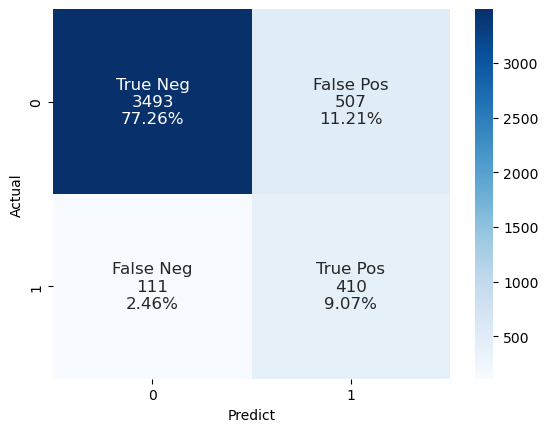

In [343]:
y_LGB_pred = LGB.predict(X_test)

classification_report_LGB = classification_report(y_test, y_LGB_pred)
print(classification_report_LGB)

confusion_matrix_LGB = confusion_matrix(y_test, y_LGB_pred)
make_confusion_matrix (confusion_matrix_LGB)

<a name="5"></a>
# **<h1 id="5" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Feed Forward Neural Network</h1>**

In [483]:
model_ffnn = Sequential([
    Dense(256, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [484]:
model_ffnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_ffnn.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
2826/2826 [==============================] - 6s 2ms/step - loss: 0.2791 - accuracy: 0.8885
Epoch 2/10
2826/2826 [==============================] - 5s 2ms/step - loss: 0.2478 - accuracy: 0.8940
Epoch 3/10
2826/2826 [==============================] - 5s 2ms/step - loss: 0.2413 - accuracy: 0.8974
Epoch 4/10
2826/2826 [==============================] - 5s 2ms/step - loss: 0.2365 - accuracy: 0.8997
Epoch 5/10
2826/2826 [==============================] - 6s 2ms/step - loss: 0.2328 - accuracy: 0.8998
Epoch 6/10
2826/2826 [==============================] - 9s 3ms/step - loss: 0.2308 - accuracy: 0.9022
Epoch 7/10
2826/2826 [==============================] - 8s 3ms/step - loss: 0.2282 - accuracy: 0.9011
Epoch 8/10
2826/2826 [==============================] - 5s 2ms/step - loss: 0.2258 - accuracy: 0.9025
Epoch 9/10
2826/2826 [==============================] - 4s 2ms/step - loss: 0.2229 - accuracy: 0.9029
Epoch 10/10
2826/2826 [==============================] - 4s 1ms/step - loss: 0.221

142/142 [==============================] - 0s 1ms/step
Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      4000
           1       0.43      0.78      0.55       521

    accuracy                           0.85      4521
   macro avg       0.70      0.82      0.73      4521
weighted avg       0.91      0.85      0.87      4521



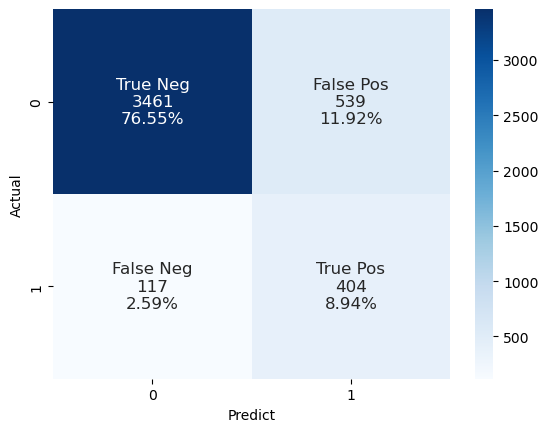

In [486]:
y_pred = model_ffnn.predict(X_test)
y_pred_classes = np.round(y_pred) 

cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(make_confusion_matrix(cm))

report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)

<a name="7"></a>
# **<h1 id="7" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Reccurent Neural Network</h1>**

In [380]:
model_rnn = Sequential([
    LSTM(units=32, input_shape=(19, 1)),
    Dense(units=1)
])

In [381]:
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
2826/2826 [==============================] - 19s 6ms/step - loss: 1.8045 - accuracy: 0.8830
Epoch 2/10
2826/2826 [==============================] - 27s 9ms/step - loss: 1.8045 - accuracy: 0.8830
Epoch 3/10
2826/2826 [==============================] - 15s 5ms/step - loss: 1.8045 - accuracy: 0.8830
Epoch 4/10
2826/2826 [==============================] - 10s 4ms/step - loss: 1.8045 - accuracy: 0.8830
Epoch 5/10
2826/2826 [==============================] - 11s 4ms/step - loss: 1.8045 - accuracy: 0.8830
Epoch 6/10
2826/2826 [==============================] - 11s 4ms/step - loss: 1.8045 - accuracy: 0.8830
Epoch 7/10
2826/2826 [==============================] - 11s 4ms/step - loss: 1.8045 - accuracy: 0.8830
Epoch 8/10
2826/2826 [==============================] - 11s 4ms/step - loss: 1.8045 - accuracy: 0.8830
Epoch 9/10
2826/2826 [==============================] - 11s 4ms/step - loss: 1.8045 - accuracy: 0.8830
Epoch 10/10
2826/2826 [==============================] - 11s 4ms/step - l

In [384]:
loss, accuracy = model_rnn.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

142/142 [==============================] - 1s 2ms/step - loss: 1.7776 - accuracy: 0.8848
Test Loss: 1.7775709629058838
Test Accuracy: 0.8847600221633911


<a name="8"></a>
# **<h1 id="8" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Overfiting</h1>**

## `Feed Forward Neural Network`

In [479]:
model_ffnn = Sequential([
    Dense(256, activation="relu", kernel_regularizer=regularizers.l1(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(128, activation="relu", kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.2),
    Dense(128, activation="relu", kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.2),
    Dense(64, activation="relu", kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.2),
    Dense(32, activation="relu", kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.2),
    Dense(16, activation="relu", kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

In [480]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model_ffnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_ffnn.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
1413/1413 [==============================] - 5s 3ms/step - loss: 2.3970 - accuracy: 0.8821 - val_loss: 0.4355 - val_accuracy: 0.8848
Epoch 2/100
1413/1413 [==============================] - 4s 3ms/step - loss: 0.4440 - accuracy: 0.8830 - val_loss: 0.4358 - val_accuracy: 0.8848
Epoch 3/100
1413/1413 [==============================] - 4s 3ms/step - loss: 0.4427 - accuracy: 0.8830 - val_loss: 0.4358 - val_accuracy: 0.8848
Epoch 4/100
1413/1413 [==============================] - 4s 3ms/step - loss: 0.4424 - accuracy: 0.8830 - val_loss: 0.4354 - val_accuracy: 0.8848
Epoch 5/100
1413/1413 [==============================] - 4s 3ms/step - loss: 0.4420 - accuracy: 0.8830 - val_loss: 0.4355 - val_accuracy: 0.8848
Epoch 6/100
1413/1413 [==============================] - 4s 3ms/step - loss: 0.4411 - accuracy: 0.8830 - val_loss: 0.4354 - val_accuracy: 0.8848
Epoch 7/100
1413/1413 [==============================] - 4s 3ms/step - loss: 0.4411 - accuracy: 0.8830 - val_loss: 0.4358 - val_ac

142/142 [==============================] - 0s 1ms/step
Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



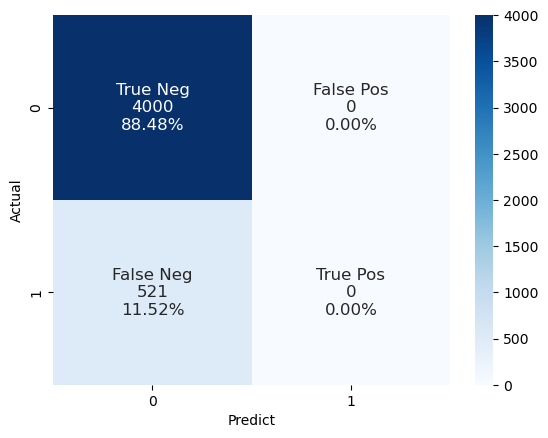

In [482]:
y_pred = model_ffnn.predict(X_test)
y_pred_classes = np.round(y_pred) 

# Obtain the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(make_confusion_matrix(cm))

# Obtain the classification report
report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)

<a name="7"></a>
# **<h1 id="7" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Improve model</h1>**

In [ ]:
def make_confusion_matrix_2_models(cm1, cm2, model1_name, model2_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts1 = ['{0:0.0f}'.format(value) for value in cm1.flatten()]
    group_percentages1 = ['{0:.2%}'.format(value) for value in cm1.flatten() / np.sum(cm1)]
    labels1 = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts1, group_percentages1)]
    labels1 = np.asarray(labels1).reshape(2, 2)

    axe1 = sns.heatmap(cm1, annot=labels1, fmt='', cmap='Blues', cbar=True, annot_kws={'fontsize': 12}, ax=axes[0])
    axe1.set(xlabel="Predict", ylabel="Actual")
    axe1.set_title(model1_name)

    group_counts2 = ['{0:0.0f}'.format(value) for value in cm2.flatten()]
    group_percentages2 = ['{0:.2%}'.format(value) for value in cm2.flatten() / np.sum(cm2)]
    labels2 = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts2, group_percentages2)]
    labels2 = np.asarray(labels2).reshape(2, 2)

    axe2 = sns.heatmap(cm2, annot=labels2, fmt='', cmap='Blues', cbar=True, annot_kws={'fontsize': 12}, ax=axes[1])
    axe2.set(xlabel="Predict", ylabel="Actual")
    axe2.set_title(model2_name)

    plt.tight_layout()
    plt.show()

## `Improvement by Grid Search`

### `KNN`

In [432]:
my_params={'n_neighbors':[1,2,3,4,5,6,7,13,14,15,16,17,18,19,20,21,22,23,24,25]}

knn=KNeighborsClassifier()
grid=GridSearchCV(knn,my_params, cv=2, error_score="raise").fit(X_train.values,y_train)

sorted(grid.cv_results_.keys())
grid_search_results=pd.DataFrame(grid.cv_results_)[['mean_test_score','std_test_score','params','rank_test_score','mean_fit_time']]
grid_search_results

,mean_test_score,std_test_score,params,rank_test_score,mean_fit_time
0,0.458245,0.268597,{'n_neighbors': 1},20,0.005026
1,0.527896,0.308785,{'n_neighbors': 2},15,0.003517
2,0.485009,0.276426,{'n_neighbors': 3},19,0.000000
3,0.527653,0.298986,{'n_neighbors': 4},16,0.010920
4,0.499563,0.277134,{'n_neighbors': 5},18,0.006864
5,0.530550,0.292329,{'n_neighbors': 6},14,0.001780
6,0.509693,0.276249,{'n_neighbors': 7},17,0.003002
7,0.531767,0.269834,{'n_neighbors': 13},13,0.000809
8,0.549661,0.276934,{'n_neighbors': 14},9,0.001546
9,0.537408,0.268839,{'n_neighbors': 15},12,0.006686


In [434]:
grid.best_params_

{'n_neighbors': 24}

In [448]:
knn=KNeighborsClassifier(n_neighbors = 24)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=24)

In [449]:
y_KNN_pred = knn.predict(X_test)
classification_report_KNN_improve = classification_report(y_test, y_KNN_pred)
confusion_matrix_KNN_improve = confusion_matrix(y_test, y_KNN_pred)

Before Improvement: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      4000
           1       0.69      0.26      0.38       521

    accuracy                           0.90      4521
   macro avg       0.80      0.62      0.66      4521
weighted avg       0.89      0.90      0.88      4521

After Improvement: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      4000
           1       0.60      0.11      0.18       521

    accuracy                           0.89      4521
   macro avg       0.75      0.55      0.56      4521
weighted avg       0.86      0.89      0.85      4521



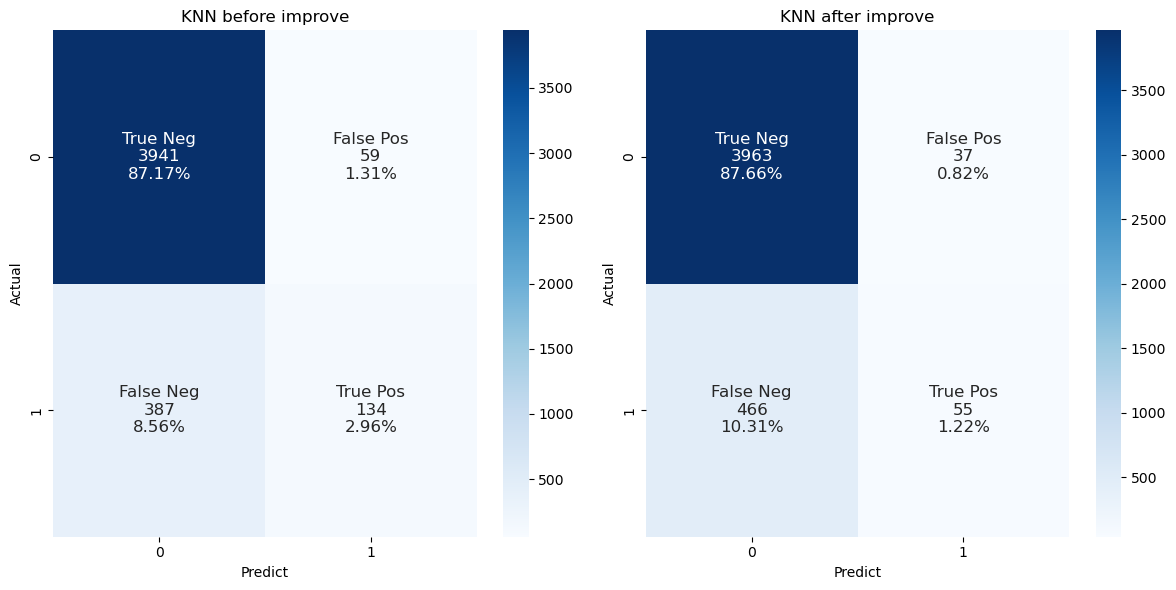

In [450]:
print("Before Improvement: \n", classification_report_KNN)
print("After Improvement: \n", classification_report_KNN_improve)
make_confusion_matrix_2_models(confusion_matrix_KNN, confusion_matrix_KNN_improve, "KNN before improve", "KNN after improve")

### `Decision Tree`

In [476]:
dt_classifier = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [477]:
y_DT_pred = best_estimator.predict(X_test)
classification_report_DT_improve = classification_report(y_test, y_DT_pred)
confusion_matrix_DT_improve = confusion_matrix(y_test, y_DT_pred)

Before Improvement: 
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      4000
           1       0.30      0.62      0.40       521

    accuracy                           0.79      4521
   macro avg       0.62      0.71      0.64      4521
weighted avg       0.87      0.79      0.82      4521

After Improvement: 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      4000
           1       0.40      0.56      0.46       521

    accuracy                           0.85      4521
   macro avg       0.67      0.72      0.69      4521
weighted avg       0.88      0.85      0.86      4521



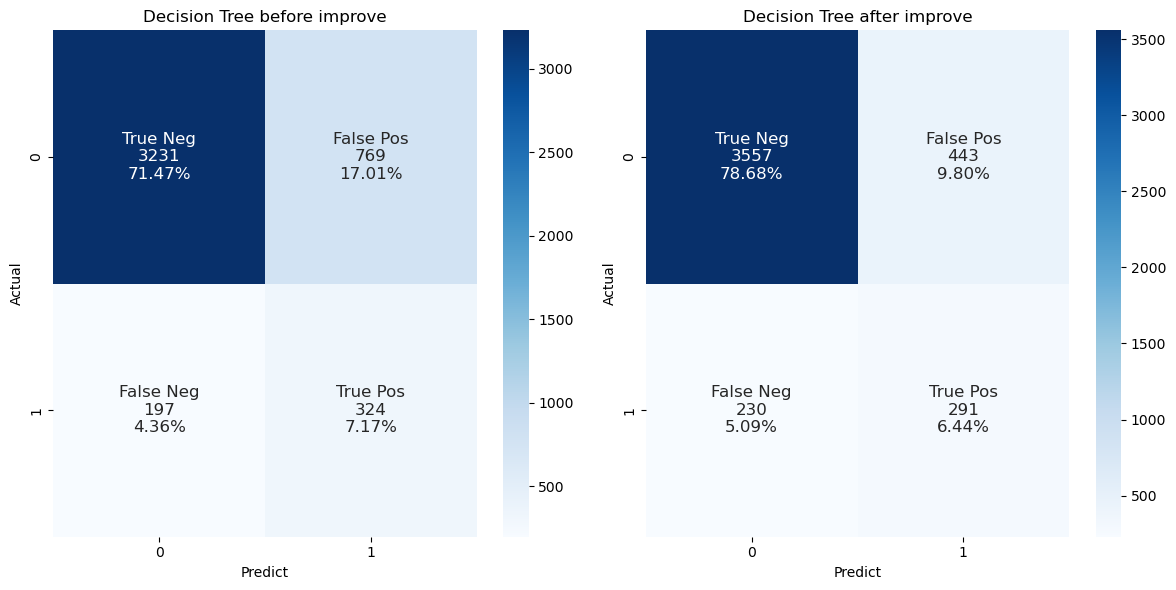

In [478]:
print("Before Improvement: \n", classification_report_DT)
print("After Improvement: \n", classification_report_DT_improve)
make_confusion_matrix_2_models(confusion_matrix_DT, confusion_matrix_DT_improve, "Decision Tree before improve", "Decision Tree after improve")

### `Random Forest`

In [452]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 100)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 218, 236, 254, 272, 290, 309, 327, 345, 363, 381, 400, 418, 436, 454, 472, 490, 509, 527, 545, 563, 581, 600, 618, 636, 654, 672, 690, 709, 727, 745, 763, 781, 800, 818, 836, 854, 872, 890, 909, 927, 945, 963, 981, 1000, 1018, 1036, 1054, 1072, 1090, 1109, 1127, 1145, 1163, 1181, 1200, 1218, 1236, 1254, 1272, 1290, 1309, 1327, 1345, 1363, 1381, 1400, 1418, 1436, 1454, 1472, 1490, 1509, 1527, 1545, 1563, 1581, 1600, 1618, 1636, 1654, 1672, 1690, 1709, 1727, 1745, 1763, 1781, 1800, 1818, 1836, 1854, 1872, 1890, 1909, 1927, 1945, 1963, 1981, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [459]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

rf_random.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'n_estimators': 1454,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [460]:
randomforestmodel=RandomForestClassifier(n_estimators= 1745,
    min_samples_split = 5,
    min_samples_leaf = 4,
    max_features = 'sqrt',
    max_depth= 10,
    bootstrap= True)

randomforestmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=1745)

In [461]:
y_RF_pred = randomforestmodel.predict(X_test)
classification_report_RF_improve = classification_report(y_test, y_KNN_pred)
confusion_matrix_RF_improve = confusion_matrix(y_test, y_RF_pred)

Before Improvement: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      4000
           1       0.49      0.73      0.59       521

    accuracy                           0.88      4521
   macro avg       0.73      0.82      0.76      4521
weighted avg       0.91      0.88      0.89      4521

After Improvement: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      4000
           1       0.56      0.58      0.57       521

    accuracy                           0.90      4521
   macro avg       0.75      0.76      0.76      4521
weighted avg       0.90      0.90      0.90      4521



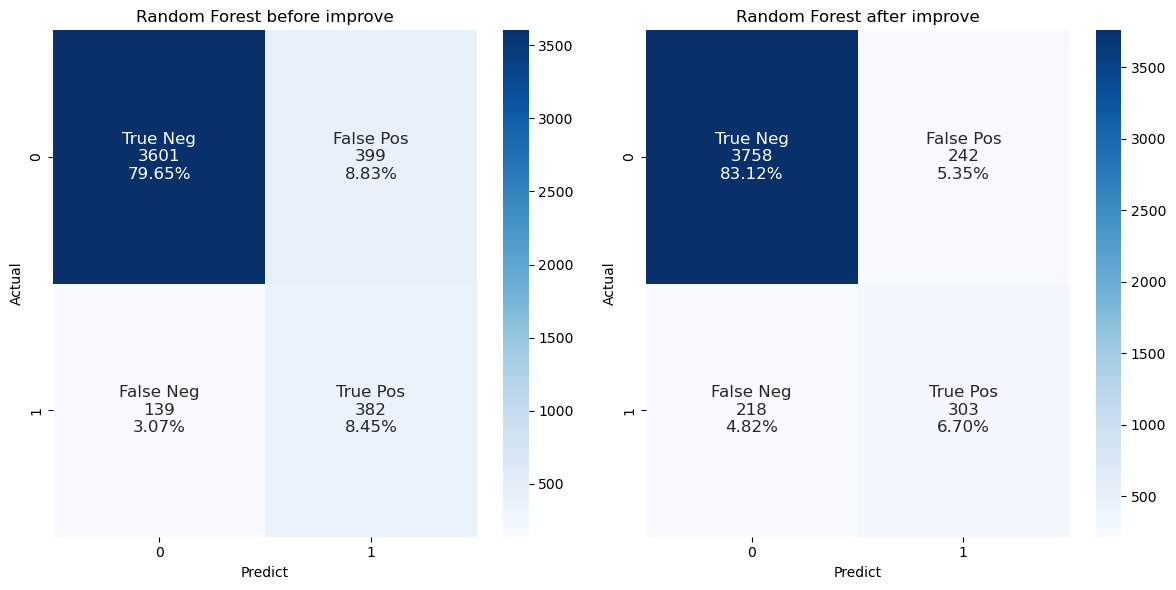

In [464]:
print("Before Improvement: \n", classification_report_RF)
print("After Improvement: \n", classification_report_RF_improve)
make_confusion_matrix_2_models(confusion_matrix_RF, confusion_matrix_RF_improve, "Random Forest before improve", "Random Forest after improve")

### `XGBoost`

In [466]:
xgb_classifier = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
}

grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train,y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


In [468]:
y_xgb_pred = best_estimator.predict(X_test)
classification_report_xgb_improve = classification_report(y_test, y_xgb_pred)
confusion_matrix_xgb_improve = confusion_matrix(y_test, y_xgb_pred)

Before Improvement: 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      4000
           1       0.44      0.73      0.55       521

    accuracy                           0.86      4521
   macro avg       0.70      0.80      0.74      4521
weighted avg       0.90      0.86      0.88      4521

After Improvement: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



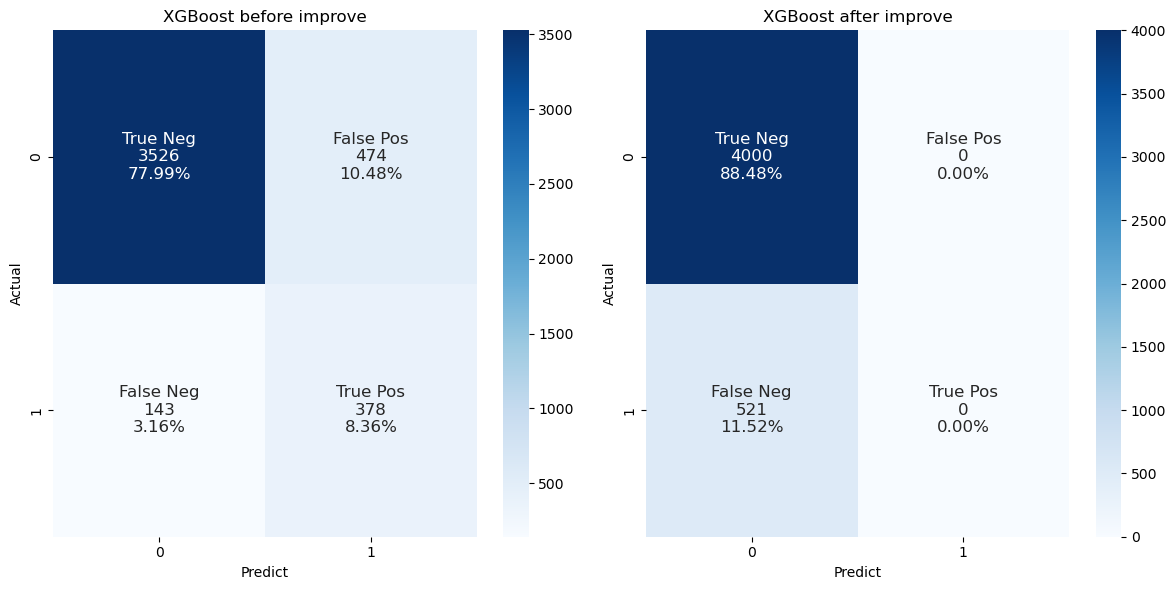

In [469]:
print("Before Improvement: \n", classification_report_xgb)
print("After Improvement: \n", classification_report_xgb_improve)
make_confusion_matrix_2_models(confusion_matrix_xgb, confusion_matrix_xgb_improve, "XGBoost before improve", "XGBoost after improve")

## `Handle Imbalanced Data`

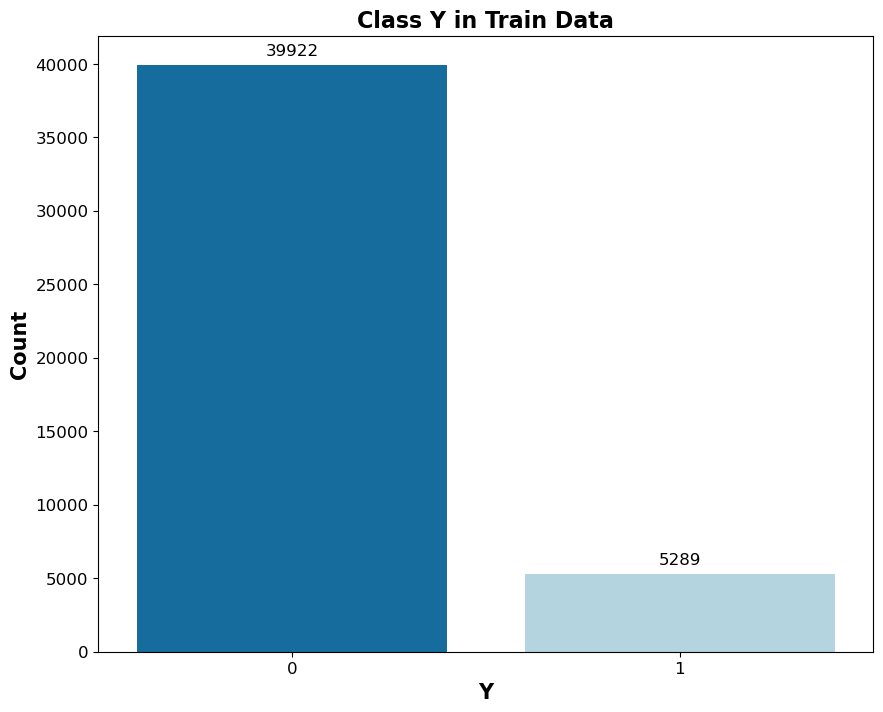

In [ ]:
custom_palette = ["#0072B2", "#ADD8E6"]
plt.figure(figsize=(10, 8))
sns.set_palette(custom_palette)
ax = sns.countplot(x='y', data=train_df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize=12,
                color='black')
plt.title('Class Y in Train Data', fontweight='bold', fontsize=16)
plt.xlabel('Y', fontsize=15,fontweight='bold')
plt.ylabel('Count', fontsize=15,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
ROS=RandomOverSampler(random_state=42)
train_df,y_train = ROS.fit_resample(train_df,y_train)

from collections import Counter
print("Updata dataset Train: ",Counter(y_train))

Updata dataset Train:  Counter({0: 39922, 1: 39922})


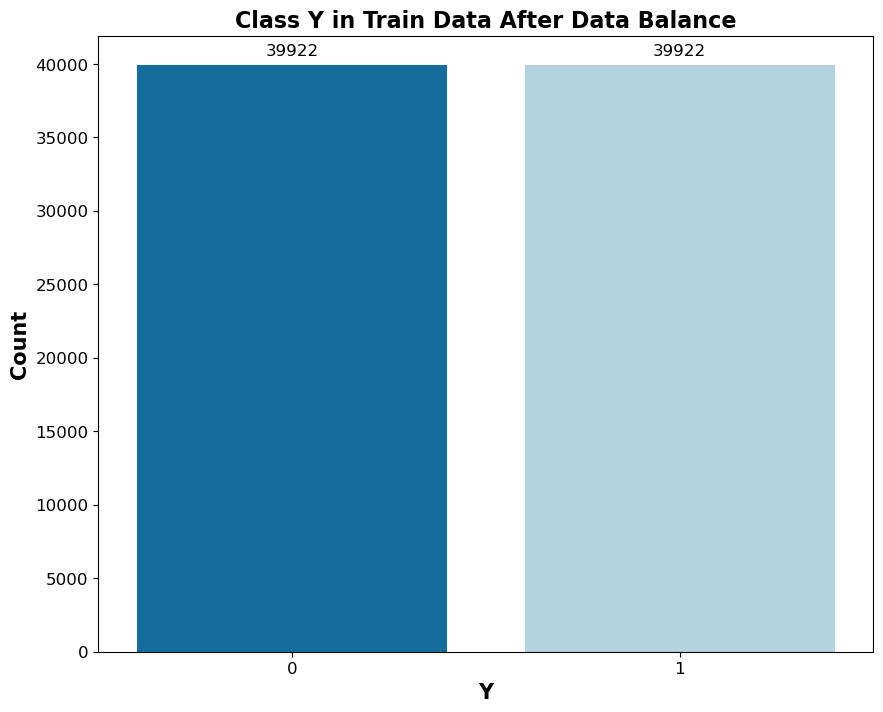

In [ ]:
custom_palette = ["#0072B2", "#ADD8E6"]
plt.figure(figsize=(10, 8))
sns.set_palette(custom_palette)
ax = sns.countplot(x='y', data=train_df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize=12,
                color='black')
plt.title('Class Y in Train Data After Data Balance', fontweight='bold', fontsize=16)
plt.xlabel('Y', fontsize=15,fontweight='bold')
plt.ylabel('Count', fontsize=15,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()